# Jupyter Notebook for Making Ablation Plots

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
# Define function for if result ends up being a 1D array of length n
# or a 2D array of length 1 containing such 1D array
def clean_npy(npy_file_path):
    loaded_npy = np.load(npy_file_path)
    if len(loaded_npy) == 1:
        return loaded_npy[0]
    else:
        return loaded_npy

In [3]:
# Function for rolling average
def rolling_avg(data, window=1000):
    if len(data) < window:
        return data  # Not enough points to smooth
    return np.convolve(data, np.ones(window)/window, mode='valid')

## Plotting for Each Optimization Method

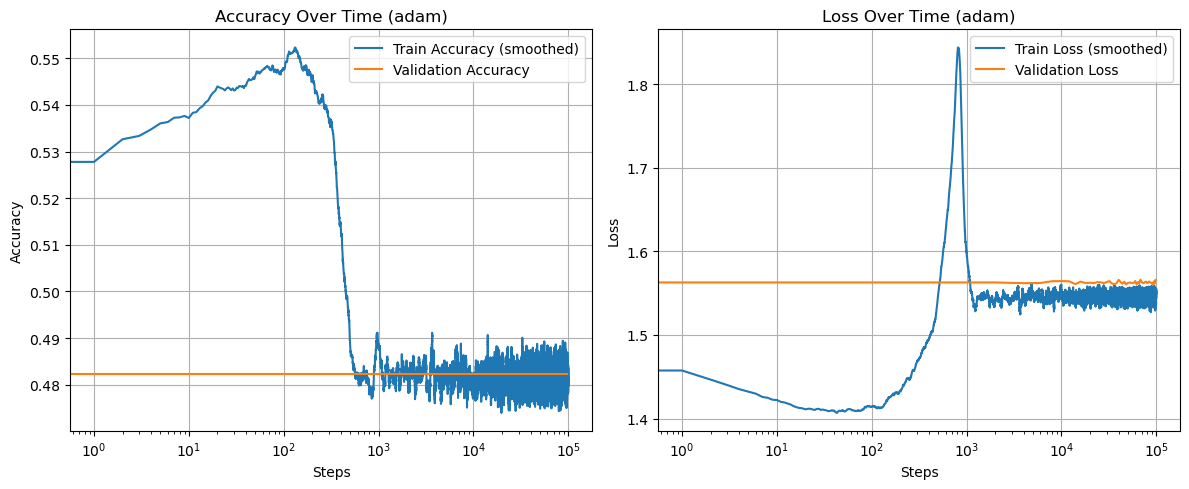

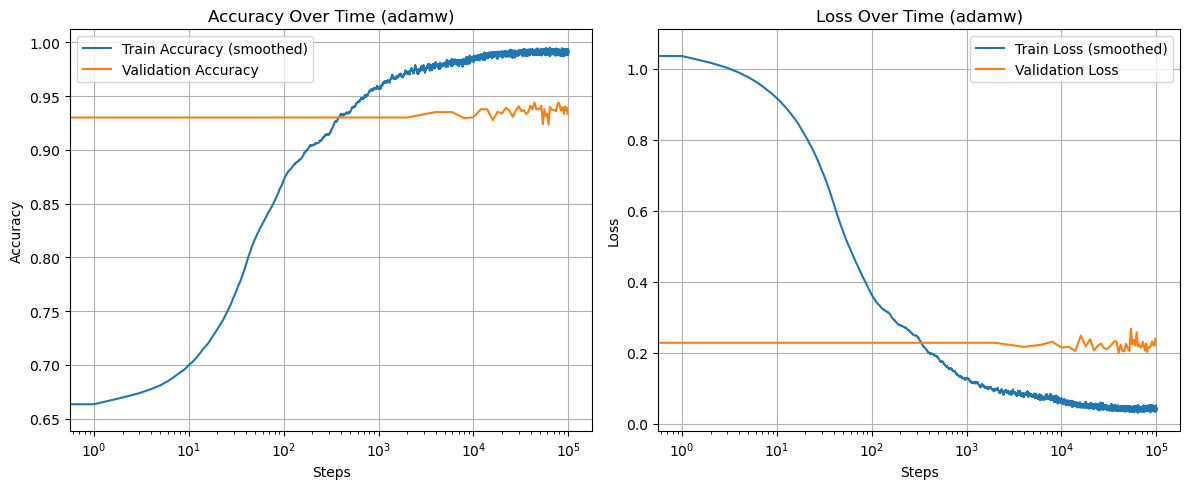

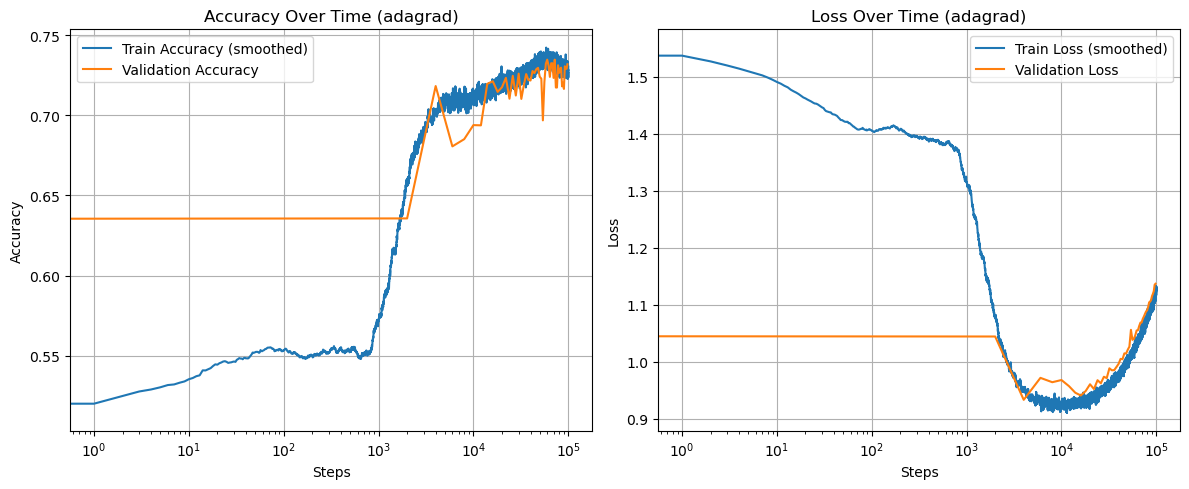

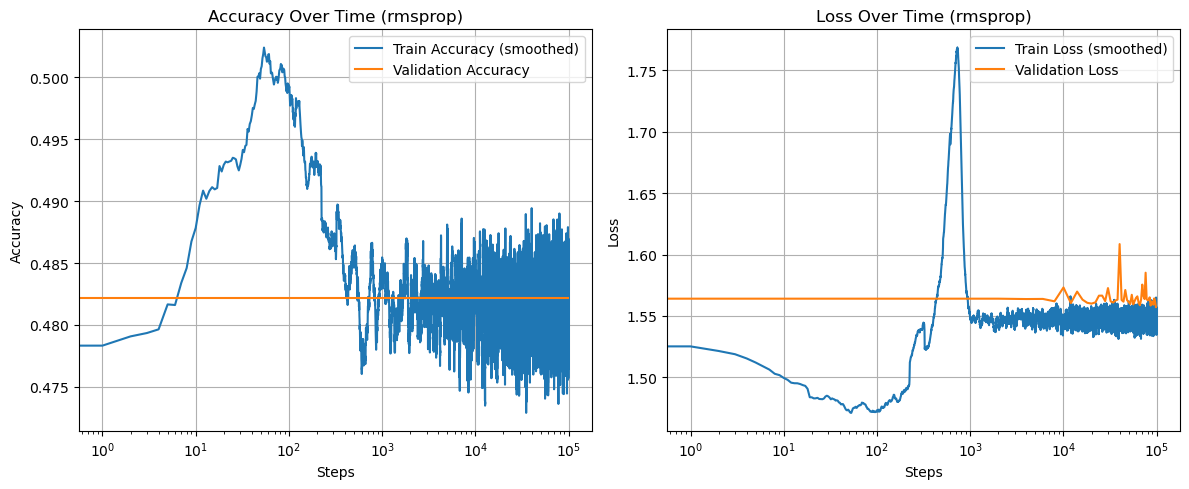

In [7]:
# Set run_opt value (1, 2, 3, or 4)
opt_map = {1: "adam", 2: "adamw", 3: "adagrad", 4: "rmsprop"}

for i in [1, 2, 3, 4]:
    # Find the optimization method
    opt_method = opt_map[i]
    
    # Import the result values for that method
    train_acc = clean_npy(f"grok_train_acc_opt{i}.npy")
    train_losses = clean_npy(f"grok_train_losses_opt{i}.npy")
    val_acc = clean_npy(f"grok_val_acc_opt{i}.npy")
    val_losses = clean_npy(f"grok_val_losses_opt{i}.npy")
    
    # Plotting begins!
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot accuracy
    train_steps = np.arange(len(train_acc))           
    val_steps = np.arange(len(val_acc)) * 2000

    # Smoothening the training curve with rolling average
    smoothed_train_acc = rolling_avg(train_acc, window=100)
    smoothed_steps = train_steps[:len(smoothed_train_acc)]

    # Plot accuracy
    ax1.plot(smoothed_steps, smoothed_train_acc, label="Train Accuracy (smoothed)")
    ax1.plot(val_steps, val_acc, label="Validation Accuracy")
    ax1.set_xscale("log")
    ax1.set_title(f"Accuracy Over Time ({opt_method})")
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Accuracy")
    ax1.legend()
    ax1.grid(True)
    
    # Smoothening the training curve with rolling average
    smoothed_train_loss = rolling_avg(train_losses, window=100)
    smoothed_loss_steps = train_steps[:len(smoothed_train_loss)]

    # Plot loss
    ax2.plot(smoothed_loss_steps, smoothed_train_loss, label="Train Loss (smoothed)")
    ax2.plot(val_steps, val_losses, label="Validation Loss")
    ax2.set_xscale("log")
    ax2.set_title(f"Loss Over Time ({opt_method})")
    ax2.set_xlabel("Steps")
    ax2.set_ylabel("Loss")
    ax2.legend()
    ax2.grid(True)
    
    # Save the figure by running the code below!
    plt.tight_layout()
    plt.savefig(f"accuracy_and_loss_opt{i}_{opt_method}.png")

    # Show figure in console
    plt.show()

# Comparing Same Metric Across Methods

Saved plot as 'method_comparison_overlayed.png'


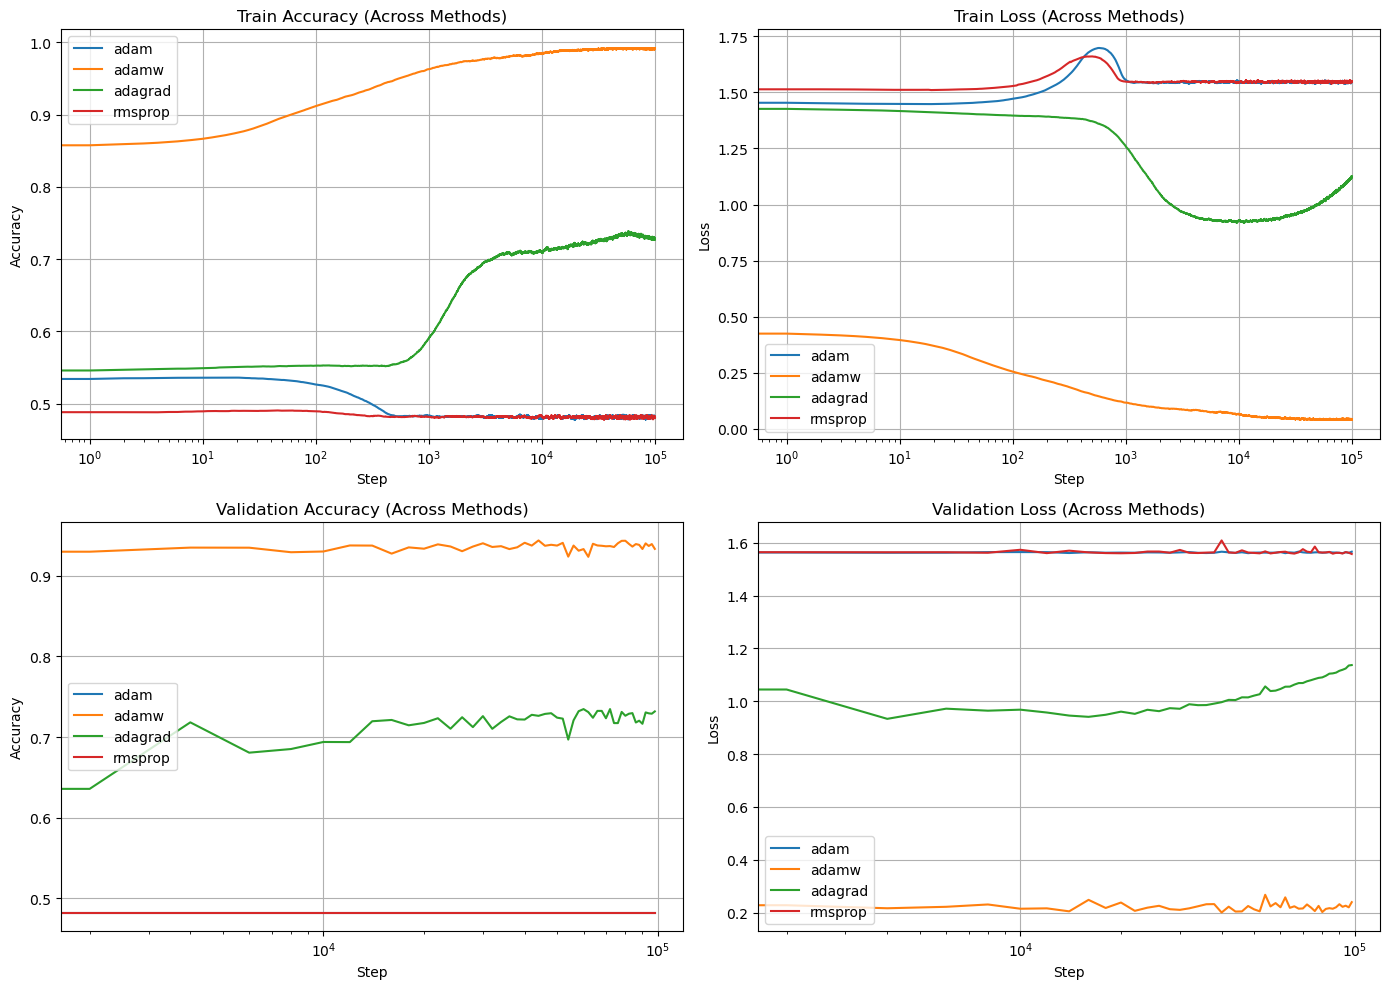

In [8]:
opt_map = {1: "adam", 2: "adamw", 3: "adagrad", 4: "rmsprop"}

# Number of methods
method_ids = [1, 2, 3, 4]

# Create subplots (2 rows × 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, method_id in enumerate(method_ids):
    method_name = opt_map[method_id]

    # Load arrays
    train_acc = clean_npy(f"grok_train_acc_opt{method_id}.npy")
    val_acc = clean_npy(f"grok_val_acc_opt{method_id}.npy")
    train_losses = clean_npy(f"grok_train_losses_opt{method_id}.npy")
    val_losses = clean_npy(f"grok_val_losses_opt{method_id}.npy")

    # Steps
    train_steps = np.arange(len(train_acc))
    val_steps = np.arange(len(val_acc)) * 2000

    # Smooth train accuracy/loss
    sm_train_acc = rolling_avg(train_acc, window=500)
    sm_train_loss = rolling_avg(train_losses, window=500)
    sm_train_steps = train_steps[:len(sm_train_acc)]  # Adjust step length after smoothing

    # Plot training curves (smoothed)
    axes[0, 0].plot(sm_train_steps, sm_train_acc, label=method_name)
    axes[0, 1].plot(sm_train_steps, sm_train_loss, label=method_name)

    # Plot validation curves (unsmoothed)
    axes[1, 0].plot(val_steps, val_acc, label=method_name)
    axes[1, 1].plot(val_steps, val_losses, label=method_name)

# Format all subplots
titles = [
    "Train Accuracy (Across Methods)",
    "Train Loss (Across Methods)",
    "Validation Accuracy (Across Methods)",
    "Validation Loss (Across Methods)"
]

for ax, title in zip(axes.flatten(), titles):
    ax.set_xscale("log")
    ax.set_title(title)
    ax.set_xlabel("Step")
    ax.grid(True)

axes[0, 0].set_ylabel("Accuracy")
axes[0, 1].set_ylabel("Loss")
axes[1, 0].set_ylabel("Accuracy")
axes[1, 1].set_ylabel("Loss")

# Add legends
for ax in axes.flatten():
    ax.legend()

# Save and show
plt.tight_layout()
plt.savefig("method_comparison_overlayed.png")
print("Saved plot as 'method_comparison_overlayed.png'")
plt.show()